In [18]:
import librosa
import numpy as np
import soundfile as sf

In [81]:
music_path = '/Users/sankysagaram/Desktop/Soundverse/audiocraft/sample_music/rap_bg_beat.wav'

In [29]:
y, sr = librosa.load(music_path, duration=10)

In [30]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

In [31]:
tempo

103.359375

In [9]:
# frames corresponding to beats
beats

array([  13,   37,   57,   78,   98,  117,  137,  157,  176,  196,  216,
        237,  257,  276,  296,  315,  332,  355,  375,  396,  416,  435,
        455,  475,  495,  514,  534,  554,  574,  594,  614,  634,  654,
        674,  693,  713,  733,  753,  773,  793,  813,  833,  852,  871,
        892,  912,  932,  952,  972,  990, 1011, 1031, 1051, 1070, 1090,
       1111, 1131, 1150, 1170, 1191, 1211, 1230, 1250, 1270, 1290, 1310,
       1330, 1350, 1369, 1389, 1409, 1429, 1449, 1469, 1489, 1509, 1529,
       1548, 1568, 1588, 1608, 1627, 1647, 1667, 1687, 1707, 1727, 1747,
       1767, 1786, 1806, 1826, 1845, 1863, 1882, 1902, 1921, 1943, 1965,
       1985, 2005, 2025, 2045, 2065, 2085, 2105, 2125, 2145, 2164, 2184,
       2204, 2224, 2244, 2263, 2281, 2301, 2320, 2339, 2359, 2380, 2400,
       2422, 2442, 2462, 2482, 2502, 2522, 2541])

In [10]:
# printing as timestamps
librosa.frames_to_time(beats, sr=sr)

array([ 0.30185941,  0.85913832,  1.32353741,  1.81115646,  2.27555556,
        2.71673469,  3.18113379,  3.64553288,  4.08671202,  4.55111111,
        5.0155102 ,  5.50312925,  5.96752834,  6.40870748,  6.87310658,
        7.31428571,  7.70902494,  8.2430839 ,  8.70748299,  9.19510204,
        9.65950113, 10.10068027, 10.56507937, 11.02947846, 11.49387755,
       11.93505669, 12.39945578, 12.86385488, 13.32825397, 13.79265306,
       14.25705215, 14.72145125, 15.18585034, 15.65024943, 16.09142857,
       16.55582766, 17.02022676, 17.48462585, 17.94902494, 18.41342404,
       18.87782313, 19.34222222, 19.78340136, 20.2245805 , 20.71219955,
       21.17659864, 21.64099773, 22.10539683, 22.56979592, 22.9877551 ,
       23.47537415, 23.93977324, 24.40417234, 24.84535147, 25.30975057,
       25.79736961, 26.26176871, 26.70294785, 27.16734694, 27.65496599,
       28.11936508, 28.56054422, 29.02494331, 29.4893424 , 29.9537415 ,
       30.41814059, 30.88253968, 31.34693878, 31.78811791, 32.25

In [14]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr,
                                         aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,
                                       sr=sr)

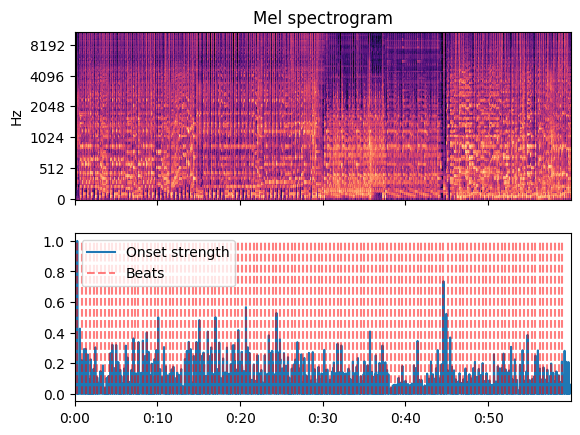

In [15]:
import matplotlib.pyplot as plt
hop_length = 512
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time', hop_length=hop_length,
                         ax=ax[0])
ax[0].label_outer()
ax[0].set(title='Mel spectrogram')
ax[1].plot(times, librosa.util.normalize(onset_env),
         label='Onset strength')
ax[1].vlines(times[beats], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')
ax[1].legend()

In [19]:
# def trim_music_by_tempo(music_path):
#     # Load the .wav file with librosa
#     y, sr = librosa.load(music_path, duration=60)
    
#     # Calculate the tempo of the music
#     tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
    
#     # Calculate the duration of one beat in seconds
#     beat_duration = 60 / tempo
    
#     # Calculate the number of beats in the loaded audio
#     num_beats = len(beats)
    
#     # Calculate the total duration of the loaded audio in seconds
#     total_duration = len(y) / sr
    
#     # Calculate the duration of one cycle of the tempo
#     cycle_duration = beat_duration * num_beats
    
#     # Calculate the starting point to trim the audio so that one cycle of the tempo ends
#     start_time = total_duration - cycle_duration
    
#     # Trim the audio to one cycle of the tempo
#     trimmed_audio = y[int(start_time * sr):]
    
#     # Save the trimmed audio to a new .wav file (optional)
#     trimmed_music_path = music_path.replace('.wav', '_trimmed.wav')
#     sf.write(trimmed_music_path, trimmed_audio, sr)
    
#     return trimmed_music_path


In [21]:
# music_path = '/Users/sankysagaram/Desktop/Soundverse/audiocraft/sample_music/tmp00snpdgf.wav'
# trimmed_music_path = trim_music_by_tempo(music_path)
# print(f"Trimmed music saved to: {trimmed_music_path}")


Trimmed music saved to: /Users/sankysagaram/Desktop/Soundverse/audiocraft/sample_music/tmp00snpdgf_trimmed.wav


In [82]:
y, sr = librosa.load(music_path, duration=10)
bpm, beats = librosa.beat.beat_track(y=y, sr=sr)

In [83]:
bpm  

151.99908088235293

In [84]:
dur = 10


In [85]:
bps = bpm/60

In [86]:
num_complete_beats = int(bps*dur)

In [87]:
trim_dur = (num_complete_beats)/bps

In [88]:
trim_dur

9.868480725623582

In [27]:
# def trim_audio_by_time(input_path, start_time, end_time, output_path):
#     # Load the .wav file with librosa
#     y, sr = librosa.load(input_path, duration=None)

#     # Calculate the starting and ending samples based on the provided time stamps
#     start_sample = int(start_time * sr)
#     end_sample = int(end_time * sr)

#     # Trim the audio to the specified time range
#     trimmed_audio = y[start_sample:end_sample]

#     # Save the trimmed audio to a new .wav file
#     sf.write(output_path, trimmed_audio, sr)

#     return output_path

In [43]:
# input_path = '/Users/sankysagaram/Desktop/Soundverse/audiocraft/sample_music/tmp00snpdgf.wav'
# output_path = '/Users/sankysagaram/Desktop/Soundverse/audiocraft/sample_music/output.wav'
# start_time = 0.00
# end_time = 9.868480725623582

# trimmed_file = trim_audio_by_time(input_path, start_time, end_time, output_path)
# print(f"Trimmed music saved to: {trimmed_file}")

Trimmed music saved to: /Users/sankysagaram/Desktop/Soundverse/audiocraft/sample_music/output.wav


In [ ]:
# y, sr = librosa.load(music_path, duration=10)
# bpm, beats = librosa.beat.beat_track(y=y, sr=sr)
# dur = 10
# bps = bpm/60
# num_complete_beats = int(bps*dur)
# trim_dur = (num_complete_beats*dur)/bps
# trim_dur


In [40]:
#len(beats)

15

In [57]:
# import librosa
# import librosa.display
# import numpy as np
# import soundfile as sf

# def trim_and_loop_music(music_path, output_path):
#     # Load the music file
#     y, sr = librosa.load(music_path, duration=10)
    
#     # Calculate the BPM (beats per minute)
#     tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
#     print(f"BPM: {tempo}")
    
#     # Calculate the duration of one beat in seconds
#     beat_duration = 60 / tempo
    
#     # Find the index of the last beat
#     last_beat_idx = librosa.time_to_samples(beats[-1] + beat_duration, sr=sr)
    
#     # Trim the music file to one beat cycle
#     trimmed_audio = y[:last_beat_idx]
    
#     # Repeat the trimmed segment to create a seamless loop
#     #num_loops = 1  # You can adjust the number of loops here
#     #looped_audio = np.tile(trimmed_audio, num_loops)
    
#     # Save the looped audio to a new .wav file
#     sf.write(output_path, trimmed_audio, sr)
    
#     return output_path



In [59]:
# # Example usage
# music_path = '/Users/sankysagaram/Desktop/Soundverse/audiocraft/sample_music/Inorbit Mall Road 5.wav'
# output_path = '/Users/sankysagaram/Desktop/Soundverse/audiocraft/sample_music/output.wav'
# trimmed_and_looped_music = trim_and_loop_music(music_path, output_path)
# print(f"Trimmed and looped music saved to: {trimmed_and_looped_music}")


BPM: 129.19921875
Trimmed and looped music saved to: /Users/sankysagaram/Desktop/Soundverse/audiocraft/sample_music/output.wav


In [69]:
# from scipy.io import wavfile

# # the timestamp to split at (in seconds)
# split_at_timestamp = 9.752380952380953

# # read the file and get the sample rate and data
# rate, data = wavfile.read('/Users/sankysagaram/Desktop/Soundverse/audiocraft/sample_music/Inorbit Mall Road 5.wav') 

# # get the frame to split at
# split_at_frame = rate * split_at_timestamp

# # split
# left_data, right_data = data[:split_at_frame-1], data[split_at_frame:]  # split

# # save the result
# wavfile.write('/Users/sankysagaram/Desktop/Soundverse/audiocraft/sample_music/output_left.wav', rate, left_data)
# wavfile.write('/Users/sankysagaram/Desktop/Soundverse/audiocraft/sample_music/output_right.wav', rate, right_data)

TypeError: slice indices must be integers or None or have an __index__ method

In [89]:
from scipy.io import wavfile

def split_wav_at_timestamp(input_wav, split_at_timestamp, output_left_path, output_right_path):
    # Read the WAV file
    rate, data = wavfile.read(input_wav)
    
    # Calculate the frame to split at
    split_at_frame = int(rate * split_at_timestamp)
    
    # Split the data into left and right segments
    left_data, right_data = data[:split_at_frame], data[split_at_frame:]
    
    # Save the left and right segments as new WAV files
    wavfile.write(output_left_path, rate, left_data)
    wavfile.write(output_right_path, rate, right_data)

# Example usage
split_at_timestamp = 9.868480725623582
split_wav_at_timestamp('/Users/sankysagaram/Desktop/Soundverse/audiocraft/sample_music/rap_bg_beat.wav',
                       split_at_timestamp,
                       '/Users/sankysagaram/Desktop/Soundverse/audiocraft/sample_music/output_left2.wav',
                       '/Users/sankysagaram/Desktop/Soundverse/audiocraft/sample_music/output_right2.wav')


In [90]:
from scipy.io import wavfile
import numpy as np

def loop_wav(input_wav, num_loops):
    # Read the WAV file
    rate, data = wavfile.read(input_wav)

    # Create a looped version of the audio
    looped_data = np.tile(data, num_loops)

    # Get the base filename without extension
    file_name = input_wav.split('/')[-1].split('.')[0]

    # Save the looped audio as a new WAV file
    looped_wav = f"{file_name}_looped_{num_loops}x.wav"
    wavfile.write(looped_wav, rate, looped_data)

    return looped_wav

# Example usage
input_wav = '/Users/sankysagaram/Desktop/Soundverse/audiocraft/sample_music/output_left2.wav'
num_loops = 3
looped_wav_file = loop_wav(input_wav, num_loops)
print(f"Looped version saved as: {looped_wav_file}")


Looped version saved as: output_left2_looped_3x.wav
